In [172]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

## 1 and 2

In [136]:
df = pd.DataFrame({
    'холодно':         [1, 0, 0, 1, 0],
    'солнце_светит':   [0, 0, 1, 1, 0],
    'идти_гулять':     [0, 1, 1, 1, 1]
}, index=[0, 1, 2, 3, 4])

print(df)


   холодно  солнце_светит  идти_гулять
0        1              0            0
1        0              0            1
2        0              1            1
3        1              1            1
4        0              0            1


In [137]:
X = df[['холодно', 'солнце_светит']]
y = df['идти_гулять']

In [138]:
model = DecisionTreeClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [139]:
model.fit(X, y)

DecisionTreeClassifier()

In [140]:
model.feature_importances_

array([0.375, 0.625])

In [141]:
df.columns[:-1].to_list()

['холодно', 'солнце_светит']

In [142]:
print("Feature columns:", X.columns)
print("Number of features in model:", model.n_features_in_)
print("Model classes_:", model.classes_)


Feature columns: Index(['холодно', 'солнце_светит'], dtype='object')
Number of features in model: 2
Model classes_: [0 1]


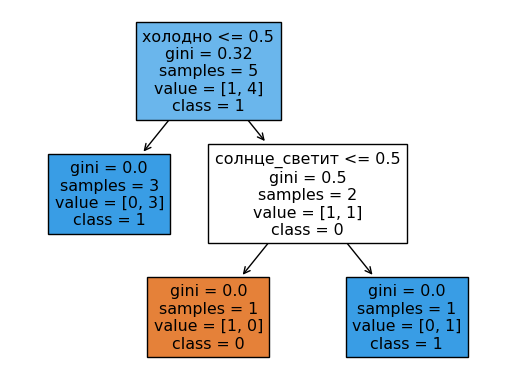

In [143]:
y_values = df.iloc[:, -1].unique().tolist()
class_names_str = [str(val) for val in y_values]

plot_tree(
    model,
    feature_names=df.columns[:-1],
    class_names=class_names_str,
    filled=True
)
plt.show()

## 3-8

In [144]:
df = pd.read_csv('light_music.csv')

In [145]:
cat_cols = df.select_dtypes(include=['object']).columns

if len(cat_cols) > 0:
    print("Категориальные признаки:", list(cat_cols))

Категориальные признаки: ['track_genre']


In [146]:
encoder = OrdinalEncoder()
df['track_genre'] = encoder.fit_transform(df[['track_genre']])

In [147]:
train, test = train_test_split(df, test_size=0.2, random_state=1)

In [148]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (4000, 16)
Test shape: (1000, 16)


In [149]:
target = 'popularity'
features = [col for col in train.columns if col != target]

In [150]:
tree_reg = DecisionTreeRegressor(random_state=1)
tree_reg.fit(train[features], train[target])

DecisionTreeRegressor(random_state=1)

In [154]:
tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1,
 'splitter': 'best'}

In [151]:
tree_reg.feature_importances_

array([0.09839449, 0.00323008, 0.08246199, 0.07705069, 0.04828361,
       0.07477605, 0.00924105, 0.06873441, 0.13204322, 0.04957027,
       0.10310134, 0.09514058, 0.10025029, 0.00612358, 0.05159836])

In [152]:
train_pred = tree_reg.predict(train[features])
test_pred = tree_reg.predict(test[features])

In [155]:
mse_train = mean_squared_error(train[target], train_pred)
mse_test = mean_squared_error(test[target], test_pred)
mse_train, mse_test

(20.26219201619459, 882.1089755234448)

In [160]:
# depth
print(tree_reg.get_depth())

30


In [161]:
best_mse = float('inf')
best_depth = None

In [167]:
for depth in range(1, 26):
    
    tree_reg = DecisionTreeRegressor(random_state=1, max_depth=depth)
    tree_reg.fit(train[features], train[target])
    test_pred = tree_reg.predict(test[features])
    mse_test = mean_squared_error(test[target], test_pred)
    
    if mse_test < best_mse:
        best_mse = mse_test
        best_depth = depth

In [168]:
print("Best depth:", best_depth)
print("Best MSE on test:", round(best_mse, 2))

Best depth: 10
Best MSE on test: 705.91


In [ ]:
tree_reg = DecisionTreeRegressor(random_state=1)
tree_reg.fit(train[features], train[target])
mse_test = mean_squared_error(test[target], test_pred)

In [169]:
# Create binary target variables for classification
y_train_bin = (train['popularity'] > 50).astype(int)
y_test_bin = (test['popularity'] > 50).astype(int)

# Count the number of instances in each class
test_class1 = y_test_bin.sum()
test_class0 = (y_test_bin == 0).sum()

train_class1 = y_train_bin.sum()
train_class0 = (y_train_bin == 0).sum()

test_class1, test_class0, train_class1, train_class0

(401, 599, 1627, 2373)

In [175]:
best_accuracy = 0
best_depth = None

for depth in range(1, 26):
    tree_clf = DecisionTreeClassifier(random_state=1, max_depth=depth)
    tree_clf.fit(train[features], y_train_bin)
    test_pred = tree_clf.predict(test[features])
    acc = accuracy_score(y_test_bin, test_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = depth
        best_tree_model = tree_clf

print("Best depth:", best_depth)
print("Best accuracy on test:", round(best_accuracy, 4))

Best depth: 17
Best accuracy on test: 0.698


In [176]:
best_tree_model.feature_importances_

array([0.08785743, 0.01193274, 0.06416407, 0.08414656, 0.04584355,
       0.10166065, 0.00600716, 0.0847808 , 0.08960204, 0.06091667,
       0.08102974, 0.11197574, 0.06537949, 0.00987257, 0.09483077])

In [177]:
for i, j in zip(features, best_tree_model.feature_importances_):
    print(i, j)

duration_ms 0.08785743080602303
explicit 0.011932740852261606
danceability 0.06416407467854163
energy 0.08414655789844931
key 0.04584355472683048
loudness 0.10166064635114293
mode 0.006007162507107673
speechiness 0.08478080231934718
acousticness 0.08960204460459704
instrumentalness 0.060916669473316296
liveness 0.08102974364668951
valence 0.11197574247232071
tempo 0.06537948939482635
time_signature 0.009872571133389336
track_genre 0.09483076913515681
